# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data/DBData.csv')

In [10]:
df = df.drop(axis=1, columns=['Indicator Code', 'Country Code', 'Unnamed: 20'])
df.sample(7)

,Country Name,Indicator Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
22129,Lithuania,Trading across borders: Cost to import: Docume...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,100.00,100.00,100.00,100.00
24706,Mexico,Protecting minority investors: Extent of corpo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,40.00,40.00,40.00,40.00,40.00
978,Antigua and Barbuda,Resolving insolvency: Strength of insolvency f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.25,31.25,31.25,31.25,31.25,31.25
8862,Croatia,Getting credit: Depth of credit information in...,NaN,0.0,0.0,0.0,50.0,50.0,66.67,66.67,83.33,83.33,83.33,NaN,NaN,NaN,NaN,NaN
7756,Colombia,Starting a business: Time - Men (days),44.0,41.0,41.0,42.0,41.0,35.0,19.00,11.00,11.00,12.00,12.00,12.00,12.00,11.00,11.00,11.00
1587,Australia,Resolving insolvency: Creditor participation i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.00,3.00,3.00,3.00,3.00
31436,Qatar,Getting electricity: Time (days),NaN,NaN,NaN,NaN,NaN,NaN,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [11]:
df = (df.pivot(index='Indicator Name',
               columns='Country Name'
               ).unstack()
      .reset_index(drop=False)
     )

In [12]:
df.sample(7)

,level_0,Country Name,Indicator Name,0
90598,2006,Belize,Trading across borders: Cost to import: Docume...,NaN
479350,2015,Armenia,Getting electricity: Mechanisms for monitoring...,1.0
173010,2007,Vietnam,Trading across borders: Documents to export (n...,5.0
236485,2009,Kenya,Rank: Enforcing contracts (1=most business-fri...,NaN
24562,2004,Mauritius,Starting a business: Procedures required - Men...,NaN
300360,2010,Tokyo,Enforcing contracts: Quality of the judicial p...,NaN
637851,2018,Pakistan,Paying taxes: Total tax rate (% of profit),33.9


In [13]:
df = (df.pivot(index=['level_0', 'Country Name'],
               columns='Indicator Name'
               ).reset_index()
      )

In [14]:
df.columns = ['year', 'Country Name'] + list(df[0].columns)

In [16]:
df.index.name='Measure'
df

,year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
Measure,,,,,,,,,,,,,,,,,,,,,
0,2004,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,Vietnam,NaN,79.05,12.0,80.00,0.7,96.54,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,66.04,71.01,NaN,80.29,68.62
3388,2019,West Bank and Gaza,NaN,56.15,12.0,80.00,14.4,28.24,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,96.86,57.99,NaN,98.21,81.45
3389,2019,"Yemen, Rep.",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [39]:
gdp = pd.read_csv('data/GDPpc.csv')
gdp.sample(7)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
194,West Bank and Gaza,PSE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1963.201519,2338.719877,2664.951385,2787.169738,2992.200995,2960.778004,2865.805109,2949.688085,3094.725747,NaN
51,Cyprus,CYP,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,32105.815900,30818.463960,32233.839420,28984.914810,27942.316670,27400.802990,23212.224700,23666.973570,25233.570980,NaN
109,Ireland,IRL,GDP per capita (current US$),NY.GDP.PCAP.CD,685.614712,739.276406,797.006288,852.135302,965.135423,1023.773726,...,52104.034720,48671.888290,52186.496270,49042.338250,51773.111370,55412.928600,61807.670370,64100.429950,69330.690150,NaN
148,Moldova,MDA,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1525.526119,1631.535832,1970.571373,2046.536787,2243.990178,2244.755308,1832.495194,1913.237414,2289.877719,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,433.941194,444.896268,461.798232,498.601747,534.374176,568.348265,...,5805.998362,7276.376756,7967.678159,7478.136578,6819.062302,6429.023950,5742.987800,5279.730472,6151.077955,NaN
237,Tonga,TON,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3070.987247,3548.068399,4044.979721,4500.750362,4278.884567,4196.470593,4093.849585,3744.492261,3959.079757,NaN
49,Curacao,CUW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Same as above with World Bank GDP Data
gdp = gdp.drop(['Country Code', 'Indicator Code'], 1)
# One row per country per year with GDP
gdp = (
    gdp.pivot(index='Indicator Name',
              columns='Country Name'
              ).unstack(
        ).reset_index(drop=False)
)
gdp = gdp.drop('Indicator Name', 1)
gdp.columns = ['Year', 'Country', 'GDPperCap']
gdp.head(3)

,Year,Country,GDPperCap
0,1960,Afghanistan,59.777327
1,1960,Albania,NaN
2,1960,Algeria,244.824806


In [41]:
edb = pd.merge(df,gdp,left_on=['year','Country Name'],right_on=['Year','Country'],how='left')

In [42]:
edb = edb.drop(axis=1, columns=['Year', 'Country'])

In [43]:
edb = edb.drop(axis=1, columns=['Country Name'])
edb = edb.astype(float)
edb = edb.dropna(axis=0,subset=['GDPperCap'])
edb = edb.dropna(axis=1,how='all')
edb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 0 to 2967
Columns: 196 entries, year to GDPperCap
dtypes: float64(196)
memory usage: 3.9 MB


In [47]:
col_txt = edb.columns
hdr_lst = []
for stg in col_txt[col_txt.str.contains(':')].str.split(':'):
    hdr_lst.append(stg[0])
hdrs = set(hdr_lst)

res = {}
done_lst = []
for hdr in hdrs:
    cols = list(edb.columns[(edb.columns.str.contains(hdr))])
    print(f"Looking now at columns with {hdr}")
    lst = edb[cols].corrwith(edb.GDPperCap)
    for x, y in lst.iteritems():
        res[x] = y
    done_lst.extend(cols)

to_do = list(set(col_txt[1:-1]) - set(done_lst))
print(f"Looking now at the remainder")
lst = edb[to_do].corrwith(edb.GDPperCap)
for x, y in lst.iteritems():
    res[x] = y

Looking now at columns with Starting a business
Looking now at columns with Registering property
Looking now at columns with Time to import
Looking now at columns with Trading across borders
Looking now at columns with Enforcing contracts
Looking now at columns with Resolving insolvency
Looking now at columns with Dealing with construction permits
Looking now at columns with Getting electricity
Looking now at columns with Time to export
Looking now at columns with Getting credit
Looking now at columns with Protecting minority investors
Looking now at columns with Paying taxes
Looking now at columns with Global
Looking now at the remainder


In [59]:
corrs = []
print(f"The 3 strongest positive correlations are:\n")
print(f"Name                                                         Corr")
for w in sorted(res, key=res.get, reverse=True)[:3]:
    print(f"{w[:55]:55s}: --> {res[w]:.4f}")
    corrs.append(w)
print(f"\nThe 3 strongest negative correlations are:\n")
print(f"Name                                                         Corr")
for w in sorted(res, key=res.get, reverse=False)[:3]:
    print(f"{w[:55]:55s}: --> {res[w]:.4f}")
    corrs.append(w)

The 3 strongest positive correlations are:

Name                                                         Corr
Getting electricity: Total duration and frequency of ou: --> 0.6470
Resolving insolvency (DB04-14 methodology) - Score     : --> 0.6447
Resolving insolvency: Recovery rate (cents on the dolla: --> 0.6442

The 3 strongest negative correlations are:

Name                                                         Corr
Trading across borders: Documents to export (number) (D: --> -0.5387
Trading across borders: Documents to import (number) (D: --> -0.4998
Time to import (days) (DB06-15 methodology)            : --> -0.4480


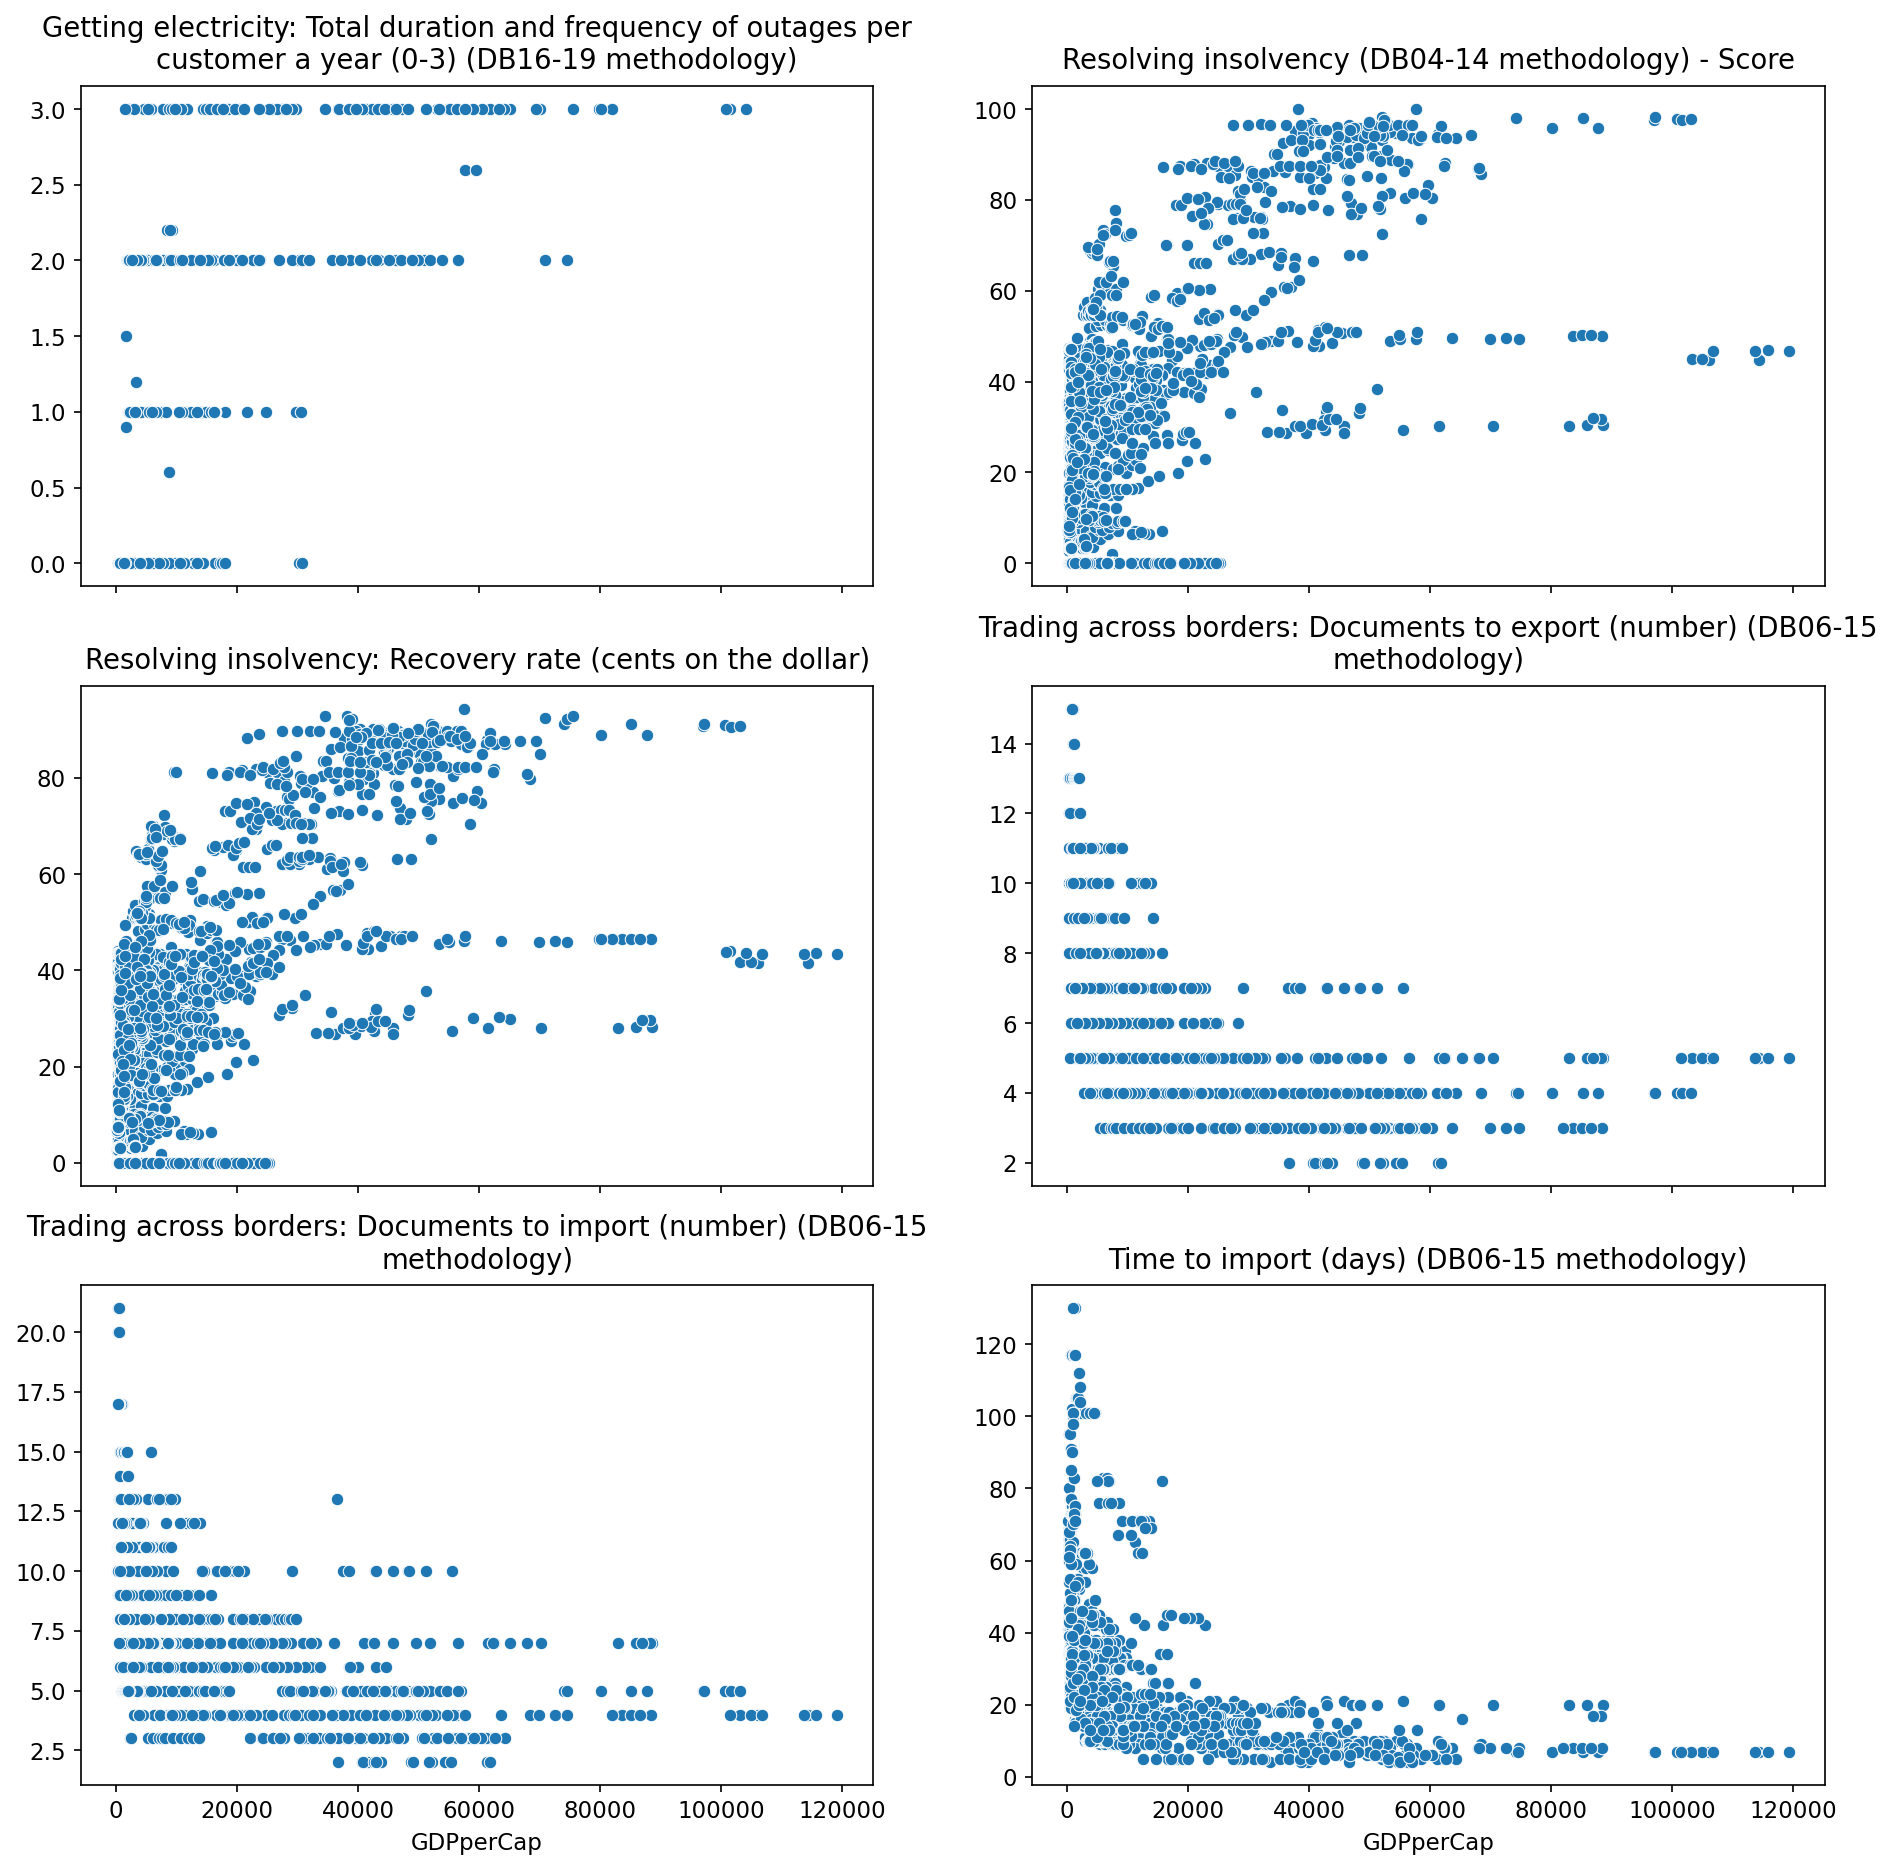

In [68]:
from textwrap import wrap
nrows, ncols = (3, 2)
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(nrows,ncols, dpi=150, figsize=(15,15), sharex='col')
cnt = 0
for i in range(nrows):
    for j in range(ncols):
        sns.scatterplot(data=edb,
                    x='GDPperCap', y=corrs[cnt],
                    ax=ax[i,j])
        ax[i, j].set_title('\n'.join(wrap(corrs[cnt])),x=0.5,y=1.01)
        ax[i, j].set_ylabel('') 
        cnt += 1

### Answer: There is a strong correlation between GDP and two measures of resolving insolvency for which the interpretation seems obvious: the more efficient a country is at resolving its severe financial woes, the better its financial health becomes (as measured by GDP).

### The strongest positive correlation is with the stability of the electrical grid in a country. In other words, the more stable the power generation/distribution system of the country the more efficient and stable the mechanization that fuels its output.
        
### The strongest negative correlations all deal with trade and the bureaucracy to conduct trade. This implies that trade barriers create inefficiencies that stunt GDP growth.

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

### The author utilizes the beneficial aspects of flavanols (present in cocoa) to draw a conclusion about causation with the number of Nobel laureates per country. However, we must question if dietary intake could really be the strongest (or of any relevance) to cognitive ability that leads to a Nobel prize. One would expect many other factors to be dominant. For example, for the sciences, the amount of R&D investment per capita would indicate more labs, institutes, universities and collaborative research centers engaged in the type of research that leads to a Nobel prize-worthy work. Furthermore, the abundance of those centers would attract more researchers to that country to conduct work thereby increasing the chances of producing a Nobel laureate. We note that of the 388 Nobel laureates listed for the US today, 104 were born outside the US. The same can be true for other fields of the Nobel prize. Spain has won 6 of its 8 Nobel prizes for literature indicating a strong heritage of literary excellence.

### It could be that cocoa consumption is an environmental __*and incidental*__ feature in strong positive correlation with other factors that characterize a country as described above – i.e. a prosperous state where R&D endeavors, literacy, and high educational standards flourish (as well as flavanols in cocoa, green tea and red wine).

### Finally, there are some issues with the data. The author takes cocoa consumption data from 2002 to 2011 and correlates it with Nobel laureates from 1906 to 2011. The data, especially if one wishes to draw a conclusion akin to that which the author makes, should be aligned in time. As pointed out above, the author did not consider the country of origin of the laureate where dark chocolate may or may not have been available. As well, some Nobel prizes are awarded to organizations (Medicines sans Fontieres) not people. In closing, one could argue that Nobel prizes for Peace do not have intellectual acuity as sine qua non but rely more on strong person ethics, determination, courage and an exceptional and unwavering commitment to the common good. (Note that some Peace prizes were awarded to politicians where perhaps none of the above traits apply.)